<a href="https://colab.research.google.com/github/dr3g0ng44m/BinPL1999/blob/master/PhiLongDIP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài Tập**
- Thực thi 4 hàm transformation.
- Cho ảnh gốc P1 và ảnh chứa histogram mong muốn P2, tìm cách biến đổi P1 thành P2.

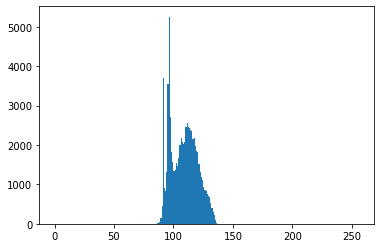

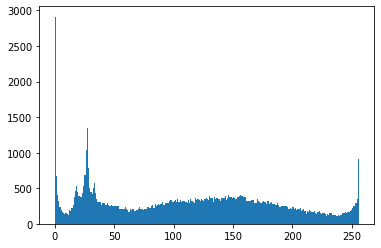

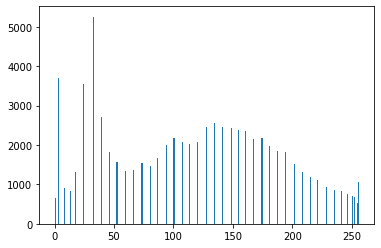

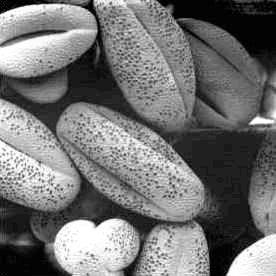

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def convertByCDF(oriLink, desLink):
  img0 = cv2.imread(oriLink,0)
  hist0 = cv2.calcHist([img0], [0], None, [256], [0,256])
  plt.hist(img0.ravel(),256,[0,256]); plt.show()

  img1 = cv2.imread(desLink,0)
  hist1 = cv2.calcHist([img1], [0], None, [256], [0,256])
  plt.hist(img1.ravel(),256,[0,256]); plt.show()

  returnCumSum = []

  cdf0 = np.cumsum(hist0)
  cdf1 = np.cumsum(hist1)
  #plt.bar(range(256), cdf0)
  #plt.bar(range(256), cdf1)

  count0 = 0
  count1 = 0
  temp = 0
  exchangeTable = np.zeros(256)
  for i in cdf1:
    while(cdf0[count0] < i):
      count0 += 1
      exchangeTable[count0] = count1
    returnCumSum.append(cdf0[count0] - temp )
    temp=cdf0[count0]
    exchangeTable[count0] = count1
    count1 += 1
  exchangeTable[count0 + 1:256] = [255]*(255-count0)


  returnPic = []
  for row in img0:
    rowInserted = []
    for pix in row:
      if exchangeTable[pix] > 0:
        rowInserted.append(exchangeTable[pix])
      else:
        i = pix
        while exchangeTable[i] > 0 and i < 255:
          i += 1
        rowInserted.append(255 if i == 255 else exchangeTable[i])
    returnPic.append(rowInserted)
  return np.asanyarray(returnPic)

oriLink = '/content/DIPpicture0.jpg'
desLink = '/content/DIPpicture1.jpg'
npReturnPic = convertByCDF(oriLink, desLink)
plt.hist(npReturnPic.ravel(),256,[0,256]); plt.show()
cv2_imshow(npReturnPic)
cv2.destroyAllWindows()


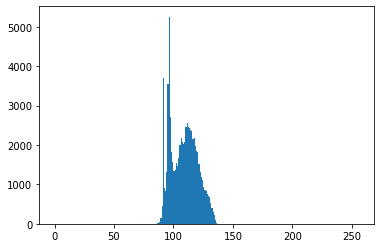

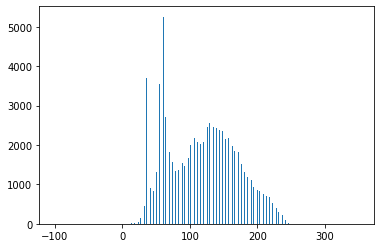

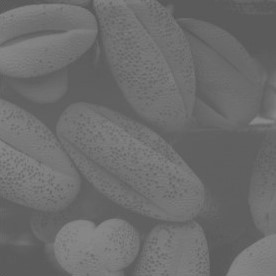

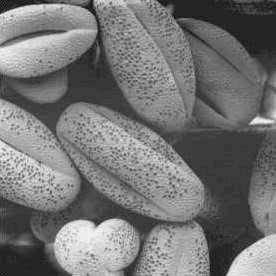

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

coefficient = {
    'linear': [5, 2],
    'expo': [3, 4],
    'loga': [5, 6]
}

img0 = cv2.imread('/content/DIPpicture0.jpg',0)
plt.hist(img0.ravel(),256,[0,256]); plt.show()

delta = img0.max() - img0.min()
imgLinear = (img0 - img0.min())/(delta)*255

plt.hist(imgLinear.ravel(),256,[-100,350]); plt.show()

cv2_imshow(img0)
cv2_imshow(imgLinear)
cv2.destroyAllWindows()

# imgZero = np.asanyarray([[0]*276]*276)
# print(imgZero)
# print(type(imgZero))
# cv2_imshow(imgZero)
# cv2.destroyAllWindows()
